In [1]:
import random
import matplotlib.pyplot as plt
import statistics as s
#workload represent the percentage distribtuon

class Simulator(object):
    def __init__(self, algorithm, workload, cache_size, seed):
        self.seed = seed
        self.algorithm = algorithm
        self.workload = workload
        self.algos = ['FIFO', 'Random', 'LRU', 'Optimal']
        self.pages = 100
        self.workloadSize = 1000
        self.cacheSequence = None
        self.hotPages = None
        self.cache_size = cache_size

    def generate_hotPages(self):
        hotPages = []
        numberOfHotPages = int((1-self.workload)*self.pages)
        while len(hotPages) < numberOfHotPages:
            page = random.randint(1, 100)
            if page not in hotPages:
                hotPages.append(page)
        self.hotPages = hotPages
        
    def workload_stats(self):
        hot = 0
        not_hot = 0
        ls = [0]*self.workloadSize
        for i in self.cacheSequence:
            if i in self.hotPages:
                hot += 1
                ls[i] = 2
            else:
                not_hot += 1
                ls[i] = 1
        plt.scatter(range(1,1001),ls)
        plt.show()

    def generate_cacheSequence(self):
        cacheSequence = [0]*self.workloadSize
        for i in xrange(int(self.workloadSize*self.workload)):
            k = random.choice(self.hotPages)
            flag = 0
            while flag == 0:
                g = random.randint(0, 999)
                if cacheSequence[g] == 0:
                    cacheSequence[g] = k
                    flag = 1
        for i in xrange(int(self.workloadSize*(1-self.workload))):
            flag_1 = 0
            while flag_1 == 0:
                k = random.choice(range(1,1001))
                if k not in self.hotPages:
                    flag_1 = 1
                    flag_2 = 0
                    while flag_2 == 0:
                        g = random.randint(0, 999)
                        if cacheSequence[g] == 0:
                            cacheSequence[g] = k
                            flag_2 = 1
        self.cacheSequence = cacheSequence

    def simulate_cache(self):
        self.generate_hotPages()
        self.generate_cacheSequence()
        if self.algorithm == "FIFO":
            hits, misses, miss_hit_table = fifo_cache(self.cacheSequence, self.cache_size)
            return  hits, misses, miss_hit_table
        elif self.algorithm == "Random":
            hits, misses, miss_hit_table = Random(self.cacheSequence, self.cache_size, self.seed) 
            return  hits, misses, miss_hit_table  
        elif self.algorithm == "LRU":
            hits, misses, miss_hit_table = lru(self.cacheSequence, self.cache_size)
            return  hits, misses, miss_hit_table
        elif self.algorithm == "Optimal":
            hits, misses, miss_hit_table = optimal(self.cacheSequence, self.cache_size)
            return  hits, misses, miss_hit_table



# cache sequence appears as a list

def fifo_cache(cache_sequence, cache_size):
    misses = 0
    hits = 0
    miss_hit_table = [0]*len(cache_sequence)
    cache = []
    firstCache_tracker = []
    for i in xrange(len(cache_sequence)):
        if cache_sequence[i] not in cache:
            if len(cache) < cache_size:
                cache.append(cache_sequence[i])
                firstCache_tracker.append(i+1)
            else:
                f = min(firstCache_tracker)
                ind = firstCache_tracker.index(f)
                cache[ind] = cache_sequence[i]
                firstCache_tracker[ind] = i+1
            misses += 1
            miss_hit_table[i] = 1
        else:
            hits += 1
            miss_hit_table[i] = 0
    return hits, misses, miss_hit_table




def Random(cache_sequence, cache_size, seed):
    misses = 0
    hits = 0
    miss_hit_table = [0]*len(cache_sequence)
    cache = []
    random.seed(seed)
    for i in xrange(len(cache_sequence)):
        if cache_sequence[i] not in cache:
            if len(cache) < cache_size:
                cache.append(cache_sequence[i])
            else:
                l = random.randint(0, cache_size-1)
                cache[l] = cache_sequence[i]
            misses += 1
            miss_hit_table[i] = 1
        else:
            hits += 1
            miss_hit_table[i] = 0
    return hits, misses, miss_hit_table    


def lru(cache_sequence, cache_size):
    misses = 0
    hits = 0
    miss_hit_table = [0]*len(cache_sequence)
    cache = []
    recentCache_tracker = []
    for i in xrange(len(cache_sequence)):
        if cache_sequence[i] not in cache:
            if len(cache) < cache_size:
                cache.append(cache_sequence[i])
                recentCache_tracker.append(i+1)
            else:
                f = min(recentCache_tracker)
                ind = recentCache_tracker.index(f)
                cache[ind] = cache_sequence[i]
                recentCache_tracker[ind] = i+1 
            misses += 1
            miss_hit_table[i] = 1
        else:
            ind = cache.index(cache_sequence[i])
            recentCache_tracker[ind] = i+1
            hits += 1
            miss_hit_table[i] = 0
    return hits, misses, miss_hit_table


def optimal(cache_sequence, cache_size):
    misses = 0
    hits = 0
    miss_hit_table = [0]*len(cache_sequence)
    cache = []
    for i in xrange(len(cache_sequence)):
        if cache_sequence[i] not in cache:
            if len(cache) < cache_size:
                cache.append(cache_sequence[i])
            else:
                flag = 0
                remove_item = None
                j = cache_sequence[i+1:]
                d = []
                for k in xrange(cache_size):
                    try:
                        d.append(j.index(cache[k]))
                    except:
                        remove_item = cache[k]
                        flag = 1
                if flag == 0:
                    remove_item = j[max(d)]
                cache.remove(remove_item)
                cache.append(cache_sequence[i])
            misses += 1
            miss_hit_table[i] = 1
        else:
            hits += 1
            miss_hit_table[i] = 0
    return hits, misses, miss_hit_table


     
#let us define a Simulator, it takes in 3 argumenst - cache_algorithm; workload percentage; cache size; seed for Random cache policy

sim_test = Simulator("FIFO", 0.9, 10, None)
sim_test.generate_hotPages()
sim_test.generate_cacheSequence()
print sim_test.hotPages
# to show the workload distribution
sim_test.workload_stats()


[72, 20, 75, 13, 71, 38, 66, 60, 17]


<Figure size 640x480 with 1 Axes>

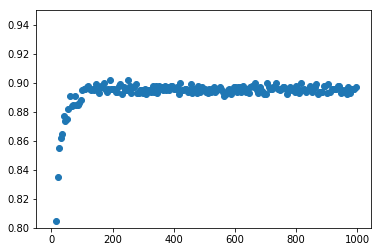

In [2]:
cache_size_list = range(1,1000,5)

#first we use the FIFO algorithm
hit_rate_list = []
for i in xrange(len(cache_size_list)):
    sim = Simulator("FIFO", 0.9, cache_size_list[i], None)
    hits, misses, miss_hit_table = sim.simulate_cache()
    hit_rate_list.append(float(hits)/sim.workloadSize)
    
plt.scatter(cache_size_list, hit_rate_list)
plt.ylim(0.8, 0.95)
plt.show()

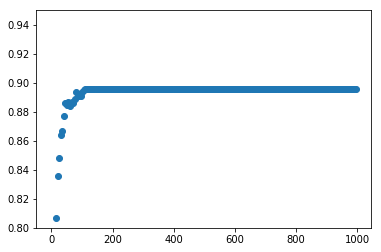

In [3]:
hit_rate_list = []
for i in xrange(len(cache_size_list)):
    #the seed here is 100
    sim = Simulator("Random", 0.9, cache_size_list[i], 100)
    hits, misses, miss_hit_table = sim.simulate_cache()
    hit_rate_list.append(float(hits)/sim.workloadSize)
    
plt.scatter(cache_size_list, hit_rate_list)
plt.ylim(0.8, 0.95)
plt.show()


#now we run the following progrsm for various other seeds


    



200


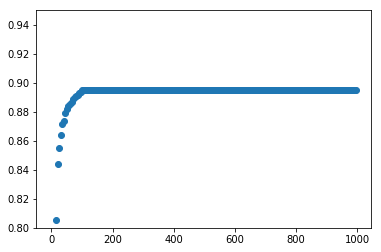

In [4]:
seeds_list = range(1,10)
hit_rate_list_mean = []
hit_rate_list_std = []
for i in xrange(len(cache_size_list)):
    l = []
    for j in seeds_list:
        sim = Simulator("Random", 0.9, cache_size_list[i], j)
        hits, misses, miss_hit_table = sim.simulate_cache()
        l.append(float(hits)/sim.workloadSize)
    hit_rate_list_mean.append(s.mean(l))
    hit_rate_list_std.append(s.stdev(l))
print len(hit_rate_list_mean)
plt.scatter(cache_size_list, hit_rate_list_mean)
plt.ylim(0.8, 0.95)
plt.show()

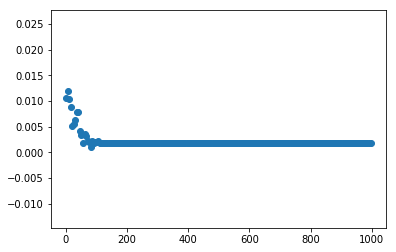

In [5]:
plt.scatter(cache_size_list, hit_rate_list_std)
#plt.ylim(0.8, 0.95)
plt.show()

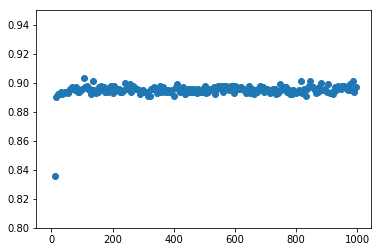

In [6]:
hit_rate_list = []
for i in xrange(len(cache_size_list)):
    sim = Simulator("LRU", 0.9, cache_size_list[i], None)
    hits, misses, miss_hit_table = sim.simulate_cache()
    hit_rate_list.append(float(hits)/sim.workloadSize)
    
plt.scatter(cache_size_list, hit_rate_list)
plt.ylim(0.8, 0.95)
plt.show()

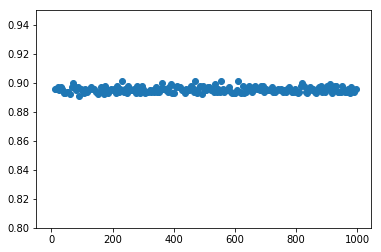

In [7]:
hit_rate_list = []
for i in xrange(len(cache_size_list)):
    sim = Simulator("Optimal", 0.9, cache_size_list[i], None)
    hits, misses, miss_hit_table = sim.simulate_cache()
    hit_rate_list.append(float(hits)/sim.workloadSize)
    
plt.scatter(cache_size_list, hit_rate_list)
plt.ylim(0.8, 0.95)
plt.show()